In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
# from ipywidgets import interact, IntSlider, FloatSlider, fixed
from astropy.convolution import convolve, Box1DKernel, Gaussian1DKernel

In [2]:
%matplotlib inline

In [3]:
plt.style.use('court.mplstyle')

In [4]:
highmass_rc_newvals = pd.read_csv('../datatables/highmass_rc_newvals.csv')
highmass_rc_newvals

,KIC,numax,pysyd_numax,e_pysyd_numax,new_numax,smooth_numax,Delnu,pysyd_dnu,e_pysyd_dnu,o_Teff,...,dPi,epsilon,l0_mean_amp,e_l0_amp,l1_vis,e_l1_vis,l2_vis,e_l2_vis,l3_vis,e_l3_vis
0,3347458,39.99,40.291621,0.904390,40.32,41.422682,3.360,3.362861,0.016179,5000,...,NaN,0.89,6979.41,566.44,0.81,0.08,0.89,0.08,0.07,0.02
1,8378545,48.82,47.769061,1.989659,48.07,48.952072,3.952,3.966159,0.022203,5058,...,NaN,0.87,4226.67,366.53,0.69,0.09,0.42,0.05,0.08,0.08
2,5978324,49.10,48.776551,0.974408,48.78,50.072904,4.024,4.072667,0.016443,5051,...,NaN,0.86,3377.46,164.37,0.67,0.05,0.48,0.05,0.04,0.02
3,10068490,66.42,58.662513,1.977989,58.84,60.906533,5.206,5.239133,0.046630,5189,...,NaN,0.87,2324.58,218.88,0.85,0.14,0.55,0.07,0.20,0.04
4,4756133,80.81,80.362852,2.357250,80.29,83.967767,5.865,5.998605,0.022750,5152,...,NaN,0.93,2426.32,188.21,0.70,0.08,0.61,0.04,0.10,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,10162765,88.56,85.502602,2.118024,85.53,89.092562,6.760,6.801791,0.023959,4948,...,NaN,0.96,2608.28,116.03,0.61,0.07,0.67,0.07,0.15,0.03
111,3430048,35.82,33.626875,2.147042,33.63,37.856607,3.487,3.518327,0.034631,5079,...,309.0,1.00,16385.41,3109.92,1.28,0.47,0.75,0.15,0.18,0.06
112,7116721,50.86,50.988298,1.581224,50.97,53.768334,4.522,4.514956,0.013743,5028,...,NaN,0.94,12634.10,1071.96,0.63,0.07,0.66,0.07,0.07,0.02
113,7347076,90.59,90.713242,1.757715,90.65,94.236618,7.216,7.217619,0.034534,5386,...,204.5,1.11,3928.05,196.75,1.20,0.12,0.58,0.07,0.13,0.02


In [5]:
highmass_rc = pd.read_csv('../datatables/highmass_rc_werr.csv')
highmass_rc

,KIC,Kpmag,QLen,DLen,numax,e_numax,Delnu,e_Delnu,A,Width,...,e_RGBcorR,ClcorM,e_ClcorM,ClcorR,e_ClcorR,Phase,M17,Simbad,_RA,_DE
0,3347458,10.30,17,1235.8,39.99,1.77,3.360,0.020,39.7,17.4,...,1.05,5.24,0.78,20.87,1.06,2,M17,Simbad,292.77283,38.432480
1,8378545,11.78,17,1235.5,48.82,4.01,3.977,0.040,23.0,22.9,...,1.57,4.90,1.24,18.21,1.57,2,M17,Simbad,296.26709,44.371861
2,5978324,10.96,18,1318.1,49.10,0.80,4.074,0.023,23.5,17.6,...,0.45,4.70,0.33,17.78,0.46,2,M17,Simbad,296.65195,41.222080
3,10068490,12.26,18,1317.7,66.42,5.52,5.206,0.076,13.7,19.1,...,1.32,4.61,1.20,15.04,1.35,2,M17,Simbad,289.05295,47.040981
4,4756133,10.58,14,974.9,80.81,2.22,5.994,0.030,19.9,31.3,...,0.45,4.51,0.43,13.51,0.45,2,M17,Simbad,294.38312,39.844940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,10162765,11.12,15,1055.8,88.56,1.62,6.795,0.032,21.1,33.4,...,0.29,3.02,0.23,10.67,0.29,2,M17,Simbad,298.81076,47.142471
111,3430048,12.06,8,557.6,35.82,1.05,3.487,0.095,62.5,17.1,...,1.09,3.01,0.45,16.64,1.08,2,M17,Simbad,287.31088,38.598862
112,7116721,13.38,18,1317.9,50.86,1.45,4.522,0.017,48.4,20.8,...,0.49,3.01,0.31,14.00,0.50,2,M17,Simbad,291.45297,42.617050
113,7347076,13.66,17,1308.5,90.59,2.34,7.216,0.045,23.6,25.8,...,0.37,3.01,0.30,10.32,0.37,2,M17,Simbad,286.28159,42.939899


In [7]:
highmass_visibilities = pd.read_csv('../datatables/highmass_visibilities.csv')

In [8]:
adopted_masses = pd.read_csv('../datatables/adopted_masses.csv')
adopted_masses

,KIC,fdnu,uncorr_mass,corr_mass,corr_mass_e,adopt_flag_int
0,3347458,1.026809,4.460233,4.958121,0.370240,1
1,8378545,1.026888,3.985832,4.432115,0.565633,0
2,5978324,1.023082,3.893824,4.265973,0.289300,1
3,10068490,1.012241,2.614595,2.744987,0.297086,0
4,4756133,1.032011,3.849515,4.366603,0.407963,1
...,...,...,...,...,...,...
110,10162765,1.007006,2.709475,2.786211,0.214213,0
111,3430048,0.989388,2.147365,2.057652,0.405930,1
112,7116721,0.994479,2.726675,2.666957,0.251209,2
113,7347076,1.003947,2.558417,2.599046,0.162971,2


In [9]:
sample_mask = np.logical_and(adopted_masses['corr_mass']>3.0,highmass_rc_newvals['pysyd_numax']>20)

In [10]:
def read_star_hp(star_name,suppress_output=True,unpack=False):
    delta_nu = highmass_rc_newvals['pysyd_dnu'][highmass_rc_newvals['KIC']==float(star_name[4:])].values[0]
    nu_max = highmass_rc_newvals['pysyd_numax'][highmass_rc_newvals['KIC']==float(star_name[4:])].values[0]
    if suppress_output == False:
        print(star_name)
        print('delta_nu =',delta_nu)
        print('nu_max =',nu_max)
    
    lightcurve = pd.read_csv('../data/hpfiltered_LCs/KIC'+star_name[4:]+'_LC.csv')
    powerspec = pd.read_csv('../data/hpfiltered_LCs/KIC'+star_name[4:]+'_PS.csv')
    if unpack == True:
        if suppress_output == False:
            print('unpacking data frames')
        time = np.asarray(lightcurve['time'])
        flux = np.asarray(lightcurve['flux'])
        freq = np.asarray(powerspec['freq'])
        power = np.asarray(powerspec['power'])
        amp = np.asarray(powerspec['amp'])
        return delta_nu,nu_max,time,flux,freq,power,amp
    else:
        if suppress_output == False:
            print('returning dataframes')
        return delta_nu,nu_max,lightcurve,powerspec

In [11]:
def read_star_bsps(star_name,suppress_output=True,unpack=False):
    delta_nu = highmass_rc_newvals['pysyd_dnu'][highmass_rc_newvals['KIC']==float(star_name[4:])].values[0]
    nu_max = highmass_rc_newvals['pysyd_numax'][highmass_rc_newvals['KIC']==float(star_name[4:])].values[0]
    if suppress_output == False:
        print(star_name)
        print('delta_nu =',delta_nu)
        print('nu_max =',nu_max)
    
    lightcurve = pd.read_csv('../data/hpfiltered_LCs/KIC'+star_name[4:]+'_LC.csv')
    powerspec = pd.read_csv('../data/pysyd_bsps/'+star_name[4:]+'_BSPS.txt', 
                            delimiter='\s+', names=['freq','power'])
    if unpack == True:
        if suppress_output == False:
            print('unpacking data frames')
        time = np.asarray(lightcurve['time'])
        flux = np.asarray(lightcurve['flux'])
        freq = np.asarray(powerspec['freq'])
        power = np.asarray(powerspec['power'])
        amp = np.asarray(powerspec['amp'])
        return delta_nu,nu_max,time,flux,freq,power,amp
    else:
        if suppress_output == False:
            print('returning dataframes')
        return delta_nu,nu_max,lightcurve,powerspec

# Computed the mode visibilities elsewhere :)

In [12]:
dennis_vis = pd.read_csv('../datatables/dennisvis.txt',sep='\s+')
dennis_vis

,KIC,Numax/muHz,Dnu/muHz,V^2(l=1),V^2(l=2),V^2(l=3),Mass/Msun,Teff/K
0,1026326,94.410,8.796,1.629,0.925,0.110,1.332,5183.0
1,1027337,74.201,6.944,1.172,0.652,0.041,1.578,5001.0
2,1164301,57.333,5.966,1.751,0.757,0.144,1.368,5080.0
3,1294122,75.847,7.031,0.345,0.509,0.072,1.677,5153.0
4,1294385,106.743,9.074,0.261,0.481,0.058,1.692,5167.0
...,...,...,...,...,...,...,...,...
3606,12834027,187.122,14.900,1.969,0.772,0.104,1.223,5081.0
3607,12834442,159.696,13.362,0.610,0.340,-0.368,1.173,5074.0
3608,12884116,50.868,5.355,1.059,0.586,0.036,1.385,4879.0
3609,12885196,91.414,8.174,1.319,0.723,0.065,1.496,4912.0


In [49]:
dennis_vis[(dennis_vis['Numax/muHz']<100) & (dennis_vis['V^2(l=1)']<0.5)]

,KIC,Numax/muHz,Dnu/muHz,V^2(l=1),V^2(l=2),V^2(l=3),Mass/Msun,Teff/K
3,1294122,75.847,7.031,0.345,0.509,0.072,1.677,5153.0
47,2155869,94.945,8.113,0.324,0.587,0.077,1.740,4936.0
56,2165198,86.321,7.763,0.279,0.609,0.018,1.589,4999.0
59,2166223,68.342,6.493,0.248,0.481,0.059,1.597,4969.0
67,2303414,64.439,6.231,0.385,0.483,0.019,1.581,4973.0
...,...,...,...,...,...,...,...,...
3477,12019910,96.903,8.197,0.477,0.743,0.036,1.958,5270.0
3498,12070670,80.038,7.123,0.195,0.438,0.003,1.799,5020.0
3513,12120872,94.282,8.451,0.189,0.466,0.017,1.520,5100.0
3556,12267816,84.878,7.842,0.271,0.474,0.064,1.520,5156.0


In [14]:
dennis_vis[(dennis_vis['KIC'])==12645606]

,KIC,Numax/muHz,Dnu/muHz,V^2(l=1),V^2(l=2),V^2(l=3),Mass/Msun,Teff/K
3598,12645606,53.796,5.83,1.228,0.815,0.084,1.243,5092.0


In [52]:
# 2141255   147.82   12.371
# 4348666   182.87   13.927
# 2305987   52.571   5.489
# 1296068   58.740   6.127

# 12453551  51.368   5.001
# 1164301   57.333   5.966
# 12645606  53.796   5.830
# 2837276   56.419   5.740

# 12019910  96.903   8.197
# 12267816  84.878   7.842

dennis_dipole = [1.352,0.124,0.512,1.420,0.688,1.751,1.228,0.797,0.477,0.271]
dennis_quadru = [0.882,0.441,0.587,0.596,0.374,0.757,0.815,0.879,0.743,0.474]
dennis_octupo = [0.050,0.068,0.110,0.019,0.058,0.144,0.084,0.136,0.036,0.064]

for i in range(0,len(dennis_vis)):
    if dennis_vis['KIC'][i] in [2141255,4348666,2305987,1296068,12453551,
                1164301,12645606,2837276,12019910,12267816]:
        print(dennis_vis.iloc[i])
        print('-------------------')

KIC           1164301.000
Numax/muHz         57.333
Dnu/muHz            5.966
V^2(l=1)            1.751
V^2(l=2)            0.757
V^2(l=3)            0.144
Mass/Msun           1.368
Teff/K           5080.000
Name: 2, dtype: float64
-------------------
KIC           1296068.000
Numax/muHz         58.740
Dnu/muHz            6.127
V^2(l=1)            1.420
V^2(l=2)            0.596
V^2(l=3)            0.019
Mass/Msun           1.261
Teff/K           4921.000
Name: 5, dtype: float64
-------------------
KIC           2141255.000
Numax/muHz        148.367
Dnu/muHz           12.339
V^2(l=1)            1.352
V^2(l=2)            0.882
V^2(l=3)            0.050
Mass/Msun           1.315
Teff/K           5130.000
Name: 45, dtype: float64
-------------------
KIC           2305987.000
Numax/muHz         52.571
Dnu/muHz            5.489
V^2(l=1)            0.512
V^2(l=2)            0.587
V^2(l=3)            0.110
Mass/Msun           1.388
Teff/K           4885.000
Name: 71, dtype: float64
----------

In [16]:
# highmass_rc_newvals['KIC'].values

In [53]:
dennis_vis_models = pd.read_csv('../datatables/dennis_vis_models.txt',sep='\s+')
dennis_vis_models

,Mass/Msun,numax/microHz,"V^2(l=1,tau=10d)","V^2(l=1,tau=20d)","V^2(l=1,tau=30d)","V^2(l=1,tau=40d)","V^2(l=2,tau=10d)","V^2(l=2,tau=20d)","V^2(l=2,tau=30d)","V^2(l=2,tau=40d)","V^2(l=3,tau=10d)","V^2(l=3,tau=20d)","V^2(l=3,tau=30d)","V^2(l=3,tau=40d)"
0,1.1,1902.586,0.012,0.006,0.004,0.003,0.012,0.006,0.004,0.003,0.012,0.006,0.004,0.003
1,1.1,1899.331,0.012,0.006,0.004,0.003,0.012,0.006,0.004,0.003,0.012,0.006,0.004,0.003
2,1.1,1896.072,0.012,0.006,0.004,0.003,0.012,0.006,0.004,0.003,0.012,0.006,0.004,0.003
3,1.1,1892.807,0.012,0.006,0.004,0.003,0.012,0.006,0.004,0.003,0.012,0.006,0.004,0.003
4,1.1,1889.503,0.012,0.006,0.004,0.003,0.012,0.006,0.004,0.003,0.012,0.006,0.004,0.003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12286,1.9,10.048,0.984,0.969,0.955,0.940,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
12287,1.9,10.041,0.984,0.969,0.955,0.941,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
12288,1.9,10.034,0.984,0.969,0.955,0.941,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
12289,1.9,10.023,0.985,0.970,0.955,0.941,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [54]:
dennis_data = pd.read_csv('../data/visibility_tests/integrated_power_snr1_snr02_4orders_ds_q0-14_mean_bin0.25a_2Dnufromnumax_epsImp_indivDegree_1.txt',
                         sep = '\s+')
dennis_data

,KIC,Dnu,numax,Int_Power_l=1(S/N-1),Int_Power_l=0(S/N-1),Int_Power_l=2(S/N-1),Int_Power_l=3(S/N-1),Epsilonmod1
0,757137,3.398,29.676,6266.0410,6798.2002,4730.9727,-178.8162,0.925
1,892107,17.851,266.416,1210.1309,2499.8413,1091.8240,235.2452,0.450
2,892738,1.254,7.877,3228.8499,4259.6343,583.6982,832.4881,0.390
3,892760,3.973,28.960,3255.6245,1848.6863,1707.3389,50.8962,0.180
4,893214,4.304,40.804,5460.6958,3997.4207,3340.2544,-104.2768,0.005
...,...,...,...,...,...,...,...,...
13396,12884116,5.355,50.868,18077.1387,16409.4824,10007.0244,613.9256,0.145
13397,12884930,3.740,37.736,9732.2383,6500.9590,6378.1514,4024.2808,0.350
13398,12885005,4.050,28.924,7101.3477,6447.2891,3841.8796,969.1000,0.645
13399,12885196,8.174,91.414,23203.0293,17472.5820,12715.9395,1147.6948,0.195


In [16]:
dennis_data[dennis_data['KIC']==2141255]
# dennis_data[dennis_data['KIC']==4348666]
# dennis_data[dennis_data['KIC']==2305987]
# dennis_data[dennis_data['KIC']==1296068]

,KIC,Dnu,numax,Int_Power_l=1(S/N-1),Int_Power_l=0(S/N-1),Int_Power_l=2(S/N-1),Int_Power_l=3(S/N-1),Epsilonmod1
148,2141255,12.339,148.367,14815.3926,11429.4668,9664.9443,551.98,0.295


In [55]:
# 12019910  96.903   8.197
# 12267816  84.878   7.842

# vistest_list = [2141255,4348666,2305987,1296068]
vistest_list = [2141255,4348666,2305987,1296068,12453551,
                1164301,12645606,2837276,12019910,12267816]
vistest_numax = [148.367,183.235,52.571,58.740,
                 51.368,57.333,53.796,56.419,96.903,84.878]
# vistest_dipole = [1.64,0.25,0.83,1.71]
# vistest_dipole = [1.44,0.19,0.78,1.6]
vistest_dipole = [1.37,0.13,0.78,1.56,0.88,1.82,1.29,0.79,0.63,0.29]
# vistest_quadru = [0.87,0.45,0.73,0.68]
vistest_quadru = [0.88,0.44,0.73,0.67,0.46,0.84,0.82,0.82,0.8,0.51]
# vistest_octupo = [0.18,0.09,0.15,0.07]
vistest_octupo = [0.14,0.07,0.14,0.06,0.13,0.16,0.11,0.15,0.09,0.1]

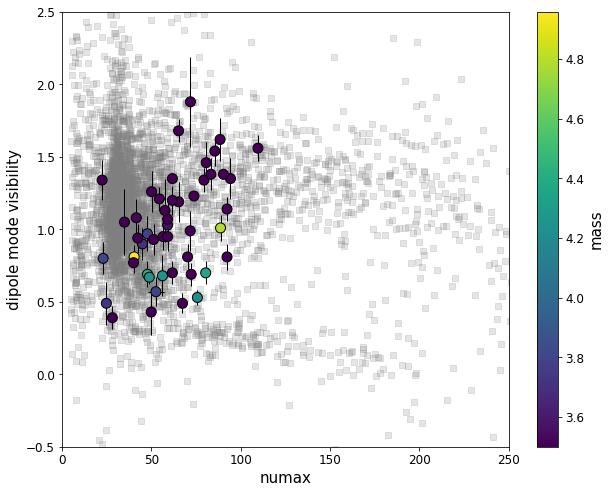

In [61]:
# plt.scatter(dennis_vis['Numax/muHz'],#[dennis_vis['Mass/Msun']>1.5],
#             dennis_vis['V^2(l=1)'],#[dennis_vis['Mass/Msun']>1.5],
#             s=40,marker='s',color='tab:grey',alpha=0.2)

plt.scatter(dennis_data['numax'][::3],
           dennis_data['Int_Power_l=1(S/N-1)'][::3]/dennis_data['Int_Power_l=0(S/N-1)'][::3],
           s=40,marker='s',color='tab:grey',alpha=0.2)

# plt.scatter(highmass_rc_newvals['pysyd_numax'],highmass_visibilities['l1_vis'],
#             c=adopted_masses['corr_mass'],cmap='viridis',s=100,edgecolor='k')
# plt.errorbar(highmass_rc_newvals['pysyd_numax'],highmass_visibilities['l1_vis'],
#              xerr=highmass_rc_newvals['e_pysyd_numax'],yerr=highmass_visibilities['e_l1_vis'],
#              linestyle='None',color='k',zorder=3)#,alpha=0.5)
# plt.scatter(highmass_rc_newvals['pysyd_numax'],highmass_visibilities['l1_vis'],
#             c=adopted_masses['corr_mass'],cmap='viridis',s=100,edgecolor='k',zorder=4)
# plt.colorbar(label='mass')
# plt.clim(vmin=2.5)

plt.errorbar(highmass_rc_newvals['pysyd_numax'][sample_mask],highmass_visibilities['l1_vis'][sample_mask],
                 xerr=highmass_rc_newvals['e_pysyd_numax'][sample_mask],yerr=highmass_visibilities['e_l1_vis'][sample_mask],
             linestyle='None',color='k',zorder=3)#,alpha=0.5)
plt.scatter(highmass_rc_newvals['pysyd_numax'][sample_mask],highmass_visibilities['l1_vis'][sample_mask],
                c=adopted_masses['corr_mass'][sample_mask],cmap='viridis',s=100,edgecolor='k',zorder=4)
plt.colorbar(label='mass')
plt.clim(vmin=3.5)



# plt.errorbar(highmass_rc_newvals['pysyd_numax'],highmass_visibilities['5o_l1_vis'],
#              xerr=highmass_rc_newvals['e_pysyd_numax'],yerr=highmass_visibilities['5o_e_l1_vis'],
#              linestyle='None',color='k',zorder=3)#,alpha=0.5)
# plt.scatter(highmass_rc_newvals['pysyd_numax'],highmass_visibilities['5o_l1_vis'],
#             c=adopted_masses['corr_mass'],cmap='seismic',s=100,edgecolor='k',zorder=4,marker='s')
# plt.colorbar(label='mass')
# plt.clim(vmin=2.5)

# for i in range(0,len(dennis_vis)):
#     if dennis_vis['KIC'][i] in vistest_list:
#         plt.scatter(dennis_vis['Numax/muHz'][i],dennis_vis['V^2(l=1)'][i],
#                     color='red',s=100,edgecolor='k',marker='s')
# plt.scatter(vistest_numax,vistest_dipole,
#             color='orange',s=100,edgecolor='k',marker='s')

# plt.plot(dennis_vis_models['numax/microHz'][dennis_vis_models['Mass/Msun']==1.9],
#          dennis_vis_models['V^2(l=1,tau=10d)'][dennis_vis_models['Mass/Msun']==1.9],linewidth=2)

# plt.scatter(highmass_rc_newvals['pysyd_numax'],highmass_rc_newvals['l1_vis'],
#             c=np.log10(highmass_rc_newvals['l0_mean_amp']*highmass_rc_newvals['l1_vis']),
#             cmap='viridis',s=100,edgecolor='k')
# plt.colorbar(label='l1_mean_amp')
# plt.clim(vmax=3.8)

# plt.scatter(highmass_rc_newvals['pysyd_numax'],highmass_rc_newvals['l1_vis'],
#             c=np.log10(highmass_rc_newvals['l0_mean_amp']),cmap='viridis',s=100,edgecolor='k')
# plt.colorbar(label='l0_mean_amp')
# plt.clim(vmax=3.8)

plt.xlim(0,250)
# plt.xlim(40,70)
plt.ylim(-0.5,2.5)
plt.xlabel('numax')
plt.ylabel('dipole mode visibility')
# plt.savefig('/Users/ccra8514/Desktop/dipole_vis',dpi=300,bbox_inches='tight')
plt.show()

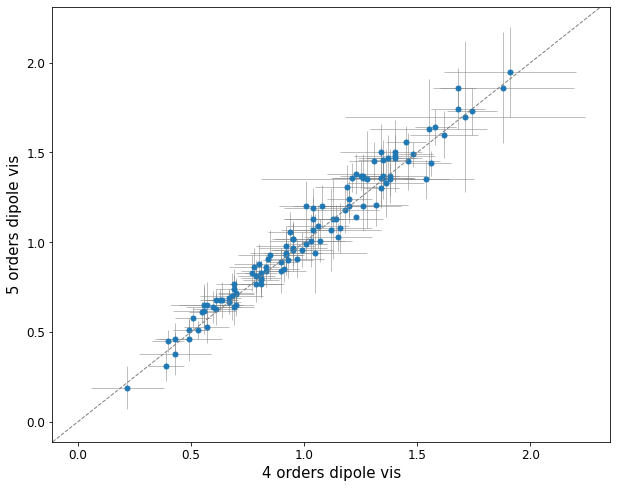

In [48]:
plt.errorbar(highmass_visibilities['l1_vis'],highmass_visibilities['5o_l1_vis'],
                 xerr=highmass_visibilities['e_l1_vis'],yerr=highmass_visibilities['5o_e_l1_vis'],
             linestyle='None',color='grey',alpha=0.5)
plt.scatter(highmass_visibilities['l1_vis'],highmass_visibilities['5o_l1_vis'],zorder=2)
plt.axline((0,0), slope=1,color='grey',linestyle='--')
plt.xlabel('4 orders dipole vis')
plt.ylabel('5 orders dipole vis')
plt.show()

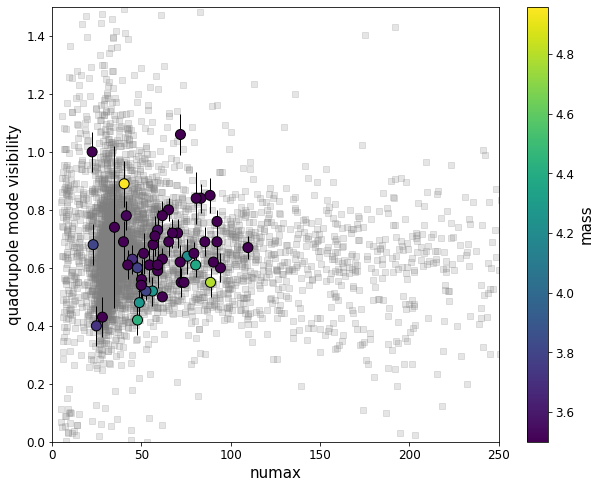

In [62]:
# plt.scatter(dennis_vis['Numax/muHz'],#[dennis_vis['Mass/Msun']>1.5],
#             dennis_vis['V^2(l=2)'],#[dennis_vis['Mass/Msun']>1.5],
#             s=40,marker='s',color='grey',alpha=0.2)

plt.scatter(dennis_data['numax'][::3],
           dennis_data['Int_Power_l=2(S/N-1)'][::3]/dennis_data['Int_Power_l=0(S/N-1)'][::3],
           s=40,marker='s',color='tab:grey',alpha=0.2)

# plt.plot(dennis_vis_models['numax/microHz'][dennis_vis_models['Mass/Msun']==1.9],
#          dennis_vis_models['V^2(l=2,tau=10d)'][dennis_vis_models['Mass/Msun']==1.9],linewidth=2)

# plt.errorbar(highmass_rc_newvals['pysyd_numax'],highmass_visibilities['l2_vis'],
#              xerr=highmass_rc_newvals['e_pysyd_numax'],yerr=highmass_visibilities['e_l2_vis'],
#              linestyle='None',color='k',zorder=3)#,alpha=0.5)
# plt.scatter(highmass_rc_newvals['pysyd_numax'],highmass_visibilities['l2_vis'],
#             c=adopted_masses['corr_mass'],cmap='viridis',s=100,edgecolor='k',zorder=4)
# plt.colorbar(label='mass')
# plt.clim(vmin=2.5)

plt.errorbar(highmass_rc_newvals['pysyd_numax'][sample_mask],highmass_visibilities['l2_vis'][sample_mask],
             xerr=highmass_rc_newvals['e_pysyd_numax'][sample_mask],yerr=highmass_visibilities['e_l2_vis'][sample_mask],
             linestyle='None',color='k',zorder=3)#,alpha=0.5)
plt.scatter(highmass_rc_newvals['pysyd_numax'][sample_mask],highmass_visibilities['l2_vis'][sample_mask],
            c=adopted_masses['corr_mass'][sample_mask],cmap='viridis',s=100,edgecolor='k',zorder=4)
plt.colorbar(label='mass')
plt.clim(vmin=3.5)

# for i in range(0,len(dennis_vis)):
#     if dennis_vis['KIC'][i] in vistest_list:
#         plt.scatter(dennis_vis['Numax/muHz'][i],dennis_vis['V^2(l=2)'][i],
#                     color='red',s=100,edgecolor='k',marker='s')
# plt.scatter(vistest_numax,vistest_quadru,
#             color='orange',s=100,edgecolor='k',marker='s')


plt.ylim(0,1.5)
plt.xlim(0,250)
# plt.xlim(40,70)
plt.xlabel('numax')
plt.ylabel('quadrupole mode visibility')
# plt.savefig('/Users/ccra8514/Desktop/quadru_vis',dpi=300,bbox_inches='tight')
plt.show()

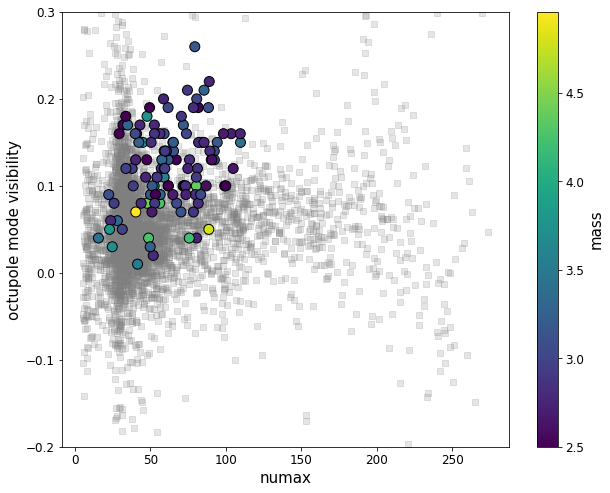

In [63]:
# plt.scatter(dennis_vis['Numax/muHz'][dennis_vis['Mass/Msun']>1.5],
#             dennis_vis['V^2(l=3)'][dennis_vis['Mass/Msun']>1.5],
#             s=40,marker='s',color='grey',alpha=0.2)

plt.scatter(dennis_data['numax'][::3],
           dennis_data['Int_Power_l=3(S/N-1)'][::3]/dennis_data['Int_Power_l=0(S/N-1)'][::3],
           s=40,marker='s',color='tab:grey',alpha=0.2)

# plt.plot(dennis_vis_models['numax/microHz'][dennis_vis_models['Mass/Msun']==1.9],
#          dennis_vis_models['V^2(l=3,tau=40d)'][dennis_vis_models['Mass/Msun']==1.9],linewidth=2)

plt.scatter(highmass_rc_newvals['pysyd_numax'],highmass_visibilities['l3_vis'],
            c=adopted_masses['corr_mass'],cmap='viridis',s=100,edgecolor='k')
plt.colorbar(label='mass')
plt.clim(vmin=2.5)

# for i in range(0,len(dennis_vis)):
#     if dennis_vis['KIC'][i] in vistest_list:
#         plt.scatter(dennis_vis['Numax/muHz'][i],dennis_vis['V^2(l=3)'][i],
#                     color='red',s=100,edgecolor='k',marker='s')
# plt.scatter(vistest_numax,vistest_octupo,
#             color='orange',s=100,edgecolor='k',marker='s')

# plt.ylim(top=1.5)
plt.ylim(-0.2,0.3)
# plt.xlim(40,70)
# plt.xlim(0,250)
plt.xlabel('numax')
plt.ylabel('octupole mode visibility')
# plt.savefig('/Users/ccra8514/Desktop/octupo_vis',dpi=300,bbox_inches='tight')
plt.show()

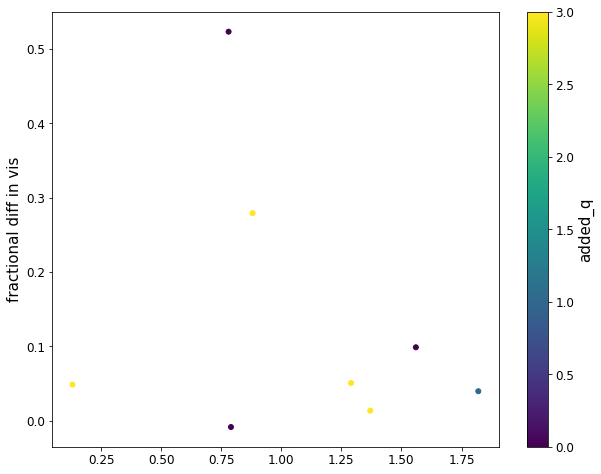

In [85]:
added_q = [3,3,0,0,3,1,3,0]
duty_cycle = [18,18,7,8,18,15,18,7]

plt.scatter(vistest_dipole,(np.asarray(vistest_dipole)-np.asarray(dennis_dipole))/np.asarray(dennis_dipole),
            c=added_q,cmap='viridis',
            label='dipole')
# plt.scatter(vistest_quadru,(np.asarray(vistest_quadru)-np.asarray(dennis_quadru))/np.asarray(dennis_quadru),
#             label='quadru')
# plt.scatter(vistest_octupo,(np.asarray(vistest_octupo)-np.asarray(dennis_octupo))/np.asarray(dennis_octupo),
#             label='octupo')

plt.colorbar(label='added_q')
# plt.xlabel('numax')
plt.ylabel('fractional diff in vis')
# plt.yscale('log')
# plt.xscale('log')
# plt.legend()
plt.show()

In [83]:
(np.asarray(vistest_dipole)-np.asarray(dennis_dipole))/np.asarray(dennis_dipole)

array([ 0.01331361,  0.0483871 ,  0.5234375 ,  0.09859155,  0.27906977,
        0.03940605,  0.0504886 , -0.00878294])

# Computing the mode visibilities

$$A_{0}^{2}(n) = \delta \nu \int_{n-e_{20}}^{n+e_{03}}[p(n')-B]dn'$$
where p = power density, B = local background, $\delta \nu$ the frequency resolution   
where also $e_{12}$ = -0.22, $e_{20}$ = -0.065, $e_{03}$ = 0.17, $e_{31}$ = 0.27   
then   
$$\langle A_{\ell}^{2} \rangle = \sum_{n_{max}-2}^{n_{max}+2} A_{\ell}^{2}(n)/ \sum_{n_{max}-2}^{n_{max}+2} exp[\frac{-(\nu_{n,\ell}-\nu_{max})^2}{2\sigma^2}]$$
and the visibility is   
$$V_{\ell}^{2} = \langle A_{\ell}^{2} \rangle/\langle A_{0}^{2} \rangle$$

and you expect roughly $V_{1}^{2}$ = 1.54, $V_{2}^{2}$ = 0.58, $V_{3}^{2}$ = 0.043

also
$$n' = \nu/\Delta\nu - \epsilon(\Delta\nu)$$

In [10]:
## good test star: KIC 3120567

delta_nu,nu_max,lightcurve,powerspec = read_star_bsps('KIC 3120567',suppress_output=False)

KIC 3120567
delta_nu = 5.419966961
nu_max = 65.17183398
returning dataframes


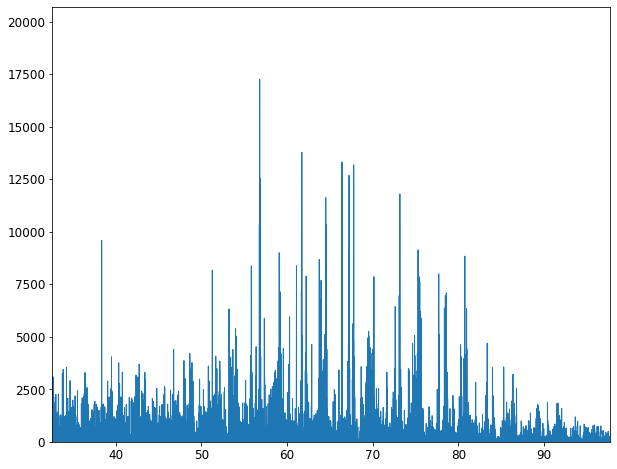

In [11]:
plt.plot(powerspec['freq'],powerspec['power'])
plt.xlim(nu_max*0.5,nu_max*1.5)
subset = powerspec['power'][(nu_max*0.8 < powerspec['freq']) & (powerspec['freq'] < nu_max*1.2)]
peak = max(subset)
plt.ylim(0,peak*1.2)
plt.show()

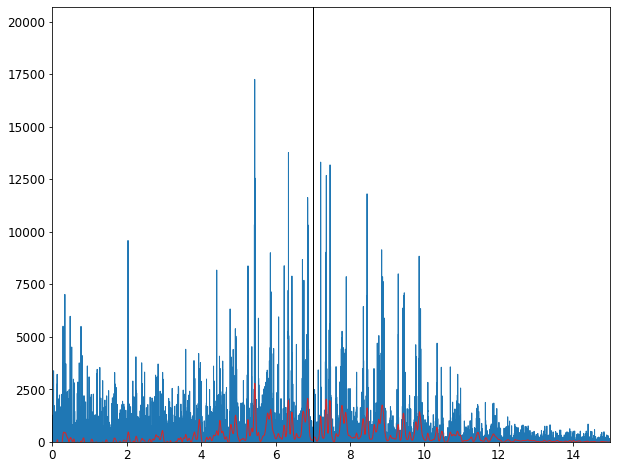

In [12]:
# ## why have you done this
n_prime = powerspec['freq']/delta_nu - highmass_rc_newvals['epsilon'][highmass_rc_newvals['KIC']==3120567].values[0]*delta_nu
freq_res = np.median(np.diff(powerspec['freq']))

plt.plot(n_prime,powerspec['power'])
plt.plot(n_prime,convolve(powerspec['power'],Gaussian1DKernel(0.02*delta_nu/freq_res)),color='tab:red')
plt.axvline(7,color='k')
# plt.xlim(nu_max*0.5,nu_max*1.5)
subset = powerspec['power'][(nu_max*0.8 < powerspec['freq']) & (powerspec['freq'] < nu_max*1.2)]
peak = max(subset)
plt.ylim(0,peak*1.2)
plt.xlim(0,15)
plt.show()

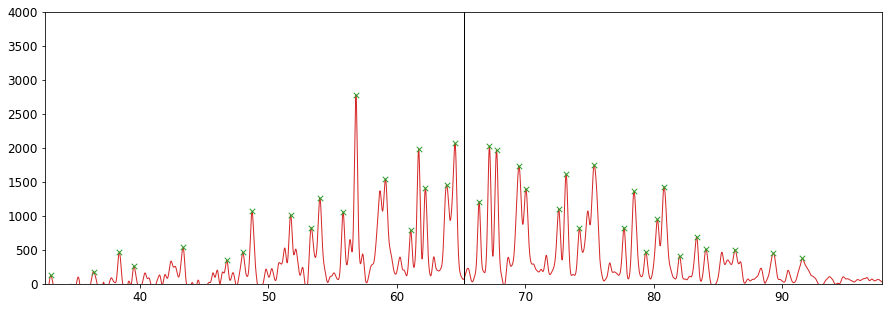

In [13]:
radial = (7 + highmass_rc_newvals['epsilon'][highmass_rc_newvals['KIC']==3120567].values[0]*delta_nu)*delta_nu

plt.figure(figsize=(15,5))
# plt.plot(powerspec['freq'],powerspec['power'])
freq_res = np.median(np.diff(powerspec['freq']))
smooth_power = convolve(powerspec['power'],Gaussian1DKernel(0.02*delta_nu/freq_res))
plt.plot(powerspec['freq'],smooth_power,color='tab:red')

peaks, _ = sp.signal.find_peaks(smooth_power,prominence=np.median(smooth_power)*250)#0.75)#prominence=10) 
found_peaks = powerspec['freq'][peaks]
plt.scatter(powerspec['freq'][peaks],smooth_power[peaks],marker='x',color='tab:green',s=30,zorder=3)

plt.axvline(radial,color='k')

plt.xlim(nu_max*0.5,nu_max*1.5)
subset = powerspec['power'][(nu_max*0.8 < powerspec['freq']) & (powerspec['freq'] < nu_max*1.2)]
peak = max(subset)
plt.ylim(0,peak*1.2)
plt.ylim(top=4000)
plt.show()

In [14]:
highmass_rc_newvals['epsilon'][highmass_rc_newvals['KIC']==3120567].values[0]

0.93

In [15]:
highmass_rc_newvals['dPi'][highmass_rc_newvals['KIC']==3120567].values[0]

221.0